## Simple cat/dog classifier


In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import itertools
import matplotlib.pyplot as plt


from utils import plot_confusion_matrix, plots

%matplotlib inline

Using TensorFlow backend.


In [2]:
train_path = 'cats-and-dogs/train'
valid_path = 'cats-and-dogs/valid'
test_path = 'cats-and-dogs/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path , classes=['dog', 'cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path , classes=['dog', 'cat'], batch_size=2)
test_batches = ImageDataGenerator().flow_from_directory(test_path , classes=['dog', 'cat'], batch_size=4)

Found 800 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
imgs, labels = next(train_batches)

/Users/matias/.virtualenvs/yolo/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


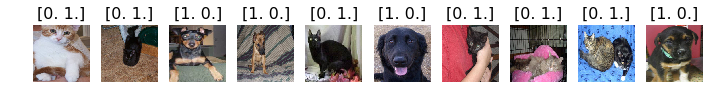

In [5]:
## [1,0] -> Dog,     [0, 1] -> Cat

plots(imgs, titles=labels)

In [15]:
# A good way of seeing the numbers corresponding to classes
train_batches.class_indices

{'dog': 0, 'cat': 1}

### Build and train CNN



In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256,256, 3)),
    Flatten(),
    Dense(2, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
model.fit_generator(train_batches,  
          steps_per_epoch=6, # Number of train images / batch_side
          validation_data=valid_batches,
          validation_steps=3, # Number of valid images / batch_side
          epochs=5, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 2s - loss: 9.6709 - acc: 0.4000 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 2/5
 - 1s - loss: 7.7904 - acc: 0.5167 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 1s - loss: 6.7159 - acc: 0.5833 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 4/5
 - 1s - loss: 7.2531 - acc: 0.5500 - val_loss: 2.6863 - val_acc: 0.8333
Epoch 5/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 10.7454 - val_acc: 0.3333


**Bad results ^**

### Predict

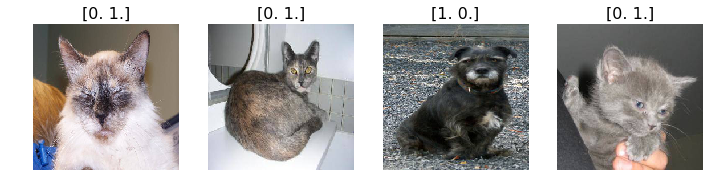

In [9]:
## It show 4 images because the batch size is 4.

test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [10]:
## we make the labels to be 1 for dog and 0 for cat. 

test_labels = test_labels[:,0]
test_labels

array([0., 0., 1., 0.], dtype=float32)

In [11]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Confusion matrix, without normalization
[[0 3]
 [0 1]]


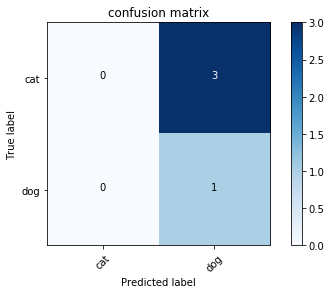

In [12]:
cm = confusion_matrix(test_labels, predictions[:,0])
plot_confusion_matrix(cm, ['cat', 'dog'])